In [51]:
#Insert dataset
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
import h5py
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, BatchNormalization,concatenate, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from emg import EMG_filter

def get_files_in_directory(path, extension):
    os.chdir(path)
    result = glob.glob('*.{}'.format(extension))
    result.sort() # Ensure correct order of files
    return result 
def array_from_csv(file):
    list_arr = pd.read_csv(file, sep=',', header=0,skiprows=2).values
    return list_arr
list_files = get_files_in_directory('C:/Users/Administrator/Desktop/MyoFile/SignalTimeRecord/', 'csv')
print(list_files)


['fist1.csv', 'fist2.csv', 'fist3.csv', 'forefinger1.csv', 'forefinger2.csv', 'forefinger3.csv', 'forefinger4.csv', 'forefinger5.csv', 'indexfinger1.csv', 'indexfinger2.csv', 'indexfinger3.csv', 'littlefinger1.csv', 'littlefinger2.csv', 'littlefinger3.csv', 'littlefinger4.csv', 'middlefinger1.csv', 'middlefinger2.csv', 'middlefinger3.csv', 'relax1.csv', 'relax2.csv', 'relax3.csv', 'thumb1.csv', 'thumb2.csv', 'thumb3.csv']


In [52]:
#Insert dataset, 截取, add label
interval = 100
data = []
label = []
for file in list_files:
    dataset = array_from_csv(file)
    emg = dataset[100:,1:4]
    #emg2 = dataset[100:,2]
    #截取数据
    for j in range(0,len(emg)-len(emg)%int(interval/2),int(interval/2)):
        if (j+interval)>len(emg): break
        sample=[]
        for i in range(interval):
            channel = []
            channel.append(emg[j+i][0])
            channel.append(emg[j+i][1])
            channel.append(emg[j+i][2])
            sample.append(channel)
        for i in range(120-interval):
            sample.append([0,0,0])
        data.append(sample)
        if("thumb" in file):
            label.append(0)
        elif("forefinger" in file):
            label.append(1)
        elif("middlefinger" in file):
            label.append(2)
        elif("indexfinger" in file):
            label.append(3)
        elif("littlefinger" in file):
            label.append(4)
        elif("fist" in file):
            label.append(5)
        elif("relax" in file):
            label.append(6)
data = np.asarray(data)
label = np.asarray(label)
print(data.shape)
print(label.shape)      

(462, 120, 3)
(462,)


In [53]:
def convert_to_one_hot(Y,C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
#随机打乱数据和标签
N = data.shape[0]
index = np.random.permutation(N)
data = data[index,:,:]
label = label[index]

#对数据升维，标签one-hot
#data = np.expand_dims(data,axis=3)
label = convert_to_one_hot(label,7).T
#划分数据集
N = data.shape[0]
num_train = round(N*0.8)
X_train = data[0:num_train,:,:]
Y_train = label[0:num_train,:]
X_test = data[num_train:N,:,:]
Y_test = label[num_train:N,:]

print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print(Y_test)

X_train shape: (370, 120, 3)
Y_train shape: (370, 7)
X_test shape: (92, 120, 3)
Y_test shape: (92, 7)
[[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0.

In [54]:
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [55]:
def CNN(input_shape=(120,3,1), classes=7): 
    X_input = Input(input_shape)
    
    X = Conv2D(filters=32, kernel_size=(20,3), strides=(1,1), activation='relu', padding='same')(X_input)
    X = MaxPooling2D((20,1))(X)

    X = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu', padding='same')(X)
    X = MaxPooling2D((2,1),)(X)
    
    X = Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu',padding='valid')(X)
    
    X = Flatten(name='flatten')(X)
    X = Dropout(0.5)(X)
    X = Dense(128,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
    return model
    
#model = CNN()
#model.summary()

In [56]:
def ML_CNN(input_shape=(120,3,1), classes=7): 
    X_input = Input(input_shape)
    
    f1 = [20, 16, 12, 8]
    f2 = [3, 4, 5, 6]
    convs = []
    
    for i in range(4):
        x = Conv2D(filters=32, kernel_size=(f1[i],3),strides=(1,1), activation='relu',padding='valid')(X_input)
        x = MaxPooling2D((20,1),padding="SAME")(x)
        
        x = Conv2D(filters=64, kernel_size=(f2[i],1), strides=(1,1), activation='relu', padding='valid')(x)
        x = MaxPooling2D((9-2-i,1),padding="SAME")(x)
        
        x = Flatten()(x)
        convs.append(x)
        
    merge = concatenate(convs,axis=1)
    X = merge
    X = Dropout(0.5)(X)
    X = Dense(128,activation='relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(classes, activation='softmax')(X)
    model = Model(inputs=X_input, outputs=X)
    return model
    
#model = ML_CNN()
#model.summary()

In [57]:
def CRNN(input_shape=(120,3), classes=7): 
    X_input = Input(input_shape)
    x = X_input
#     x = Conv1D(filters=64, kernel_size=20, strides=1, padding='Same', activation='relu')(X_input)
#     x = MaxPooling1D(20,padding="SAME")(x)
#     x = Conv1D(filters=128, kernel_size=3, strides=1, padding='Same', activation='relu')(x)
#     x = MaxPooling1D(2, padding="SAME")(x)
    #x = BatchNormalization()(x)
    #x = Conv1D(filters=128, kernel_size=3,strides=1, padding='valid', activation='relu')(x)
    #x = SimpleRNN(64)(x)
    x = LSTM(256, input_shape=(120, 3))(x)
    #x = Flatten()(x)
    x = Dropout(0.3)(x)
    x = Dense(classes, activation='softmax')(x)
    
    m = Model(inputs=X_input, outputs=x)
    return m
    
model = CRNN()
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 120, 3)]          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 256)               266240    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 1799      
Total params: 268,039
Trainable params: 268,039
Non-trainable params: 0
_________________________________________________________________


In [58]:
#训练原始数据
import time
start = time.time()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = LossHistory() # 创建一个history实例
model.fit(X_train, Y_train, epochs=120, validation_data=(X_test, Y_test),batch_size=32,callbacks=[history])

preds_train = model.evaluate(X_train, Y_train)
print("Train Loss = " + str(preds_train[0]))
print("Train Accuracy = " + str(preds_train[1]))

preds_test  = model.evaluate(X_test, Y_test)
print("Test Loss = " + str(preds_test[0]))
print("Test Accuracy = " + str(preds_test[1]))

end = time.time()
print("time:",end-start)

#保存模型
model.save('meg_mlcnn_model.h5')

Epoch 1/120
12/12 [==============================] - 3s 162ms/step - loss: 1.8500 - accuracy: 0.2400 - val_loss: 1.4337 - val_accuracy: 0.3478
Epoch 2/120
12/12 [==============================] - 2s 132ms/step - loss: 1.3574 - accuracy: 0.4027 - val_loss: 1.1699 - val_accuracy: 0.4457
Epoch 3/120
12/12 [==============================] - 2s 133ms/step - loss: 1.1762 - accuracy: 0.4933 - val_loss: 1.1300 - val_accuracy: 0.5217
Epoch 4/120
12/12 [==============================] - 2s 138ms/step - loss: 1.0114 - accuracy: 0.5855 - val_loss: 0.9519 - val_accuracy: 0.5978
Epoch 5/120
12/12 [==============================] - 2s 134ms/step - loss: 0.9263 - accuracy: 0.6148 - val_loss: 0.9249 - val_accuracy: 0.6413
Epoch 6/120
12/12 [==============================] - 2s 132ms/step - loss: 0.8901 - accuracy: 0.6295 - val_loss: 0.8620 - val_accuracy: 0.6087
Epoch 7/120
12/12 [==============================] - 2s 132ms/step - loss: 0.8458 - accuracy: 0.6714 - val_loss: 0.8910 - val_accuracy: 0.6630

KeyboardInterrupt: 

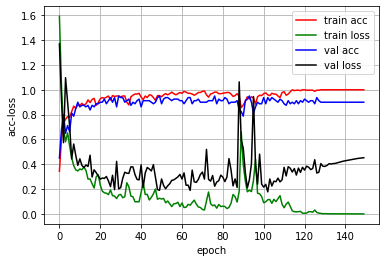

In [41]:
history.loss_plot('epoch')